## Generate table of orbital parameters

In [1]:
import sys
import aa_py
%matplotlib inline
%load_ext autoreload
%autoreload 2
from orbit import *
import json

In [2]:
from run_2comp_cluster_vmaxuniversal import generate_simproperties
peri = np.zeros(4)
apo = np.zeros_like(peri)
tidalP = np.zeros_like(apo)
tidalA = np.zeros_like(apo)
perd = np.zeros_like(tidalP)
mass_l = np.zeros_like(tidalP)
NP = np.zeros_like(tidalP)
PMMAG = np.array([0.05,0.1,0.17,0.25])
for i,pmmag in enumerate(PMMAG):
    s, ca = 2., 1.0
    simprops = generate_simproperties(SegregationParameter=s, propermotionmag=pmmag, flattening=ca,
                                     Nparticles=4e5,output_file=False)
    eq = crater2_eq()
    solar_reflex = crater2_solarreflex()
    pm = np.array([pmmag,0.])+solar_reflex
    Eq = np.array([eq[0],eq[1],distance,vlos,pm[0],pm[1]])

    rs_nfw=simprops['Rscale']
    c = simprops['c']
    Delta=simprops['Delta']

    R,T = integrate_orbits_backwards(Eq)

    peri[i],apo[i]=pericentre(R),apocentre(R)
    NP[i]=count_pericentres(R)
    tidalP[i],tidalA[i]=tidal_radius(pericentre(R),rs_nfw,c=c,Delta=Delta),tidal_radius(apocentre(R),rs_nfw,c=c,Delta=Delta)
    perd[i]=period(R,T)/nbody_tools.kms2kpcGyr
    mass_l[i]=mass_loss_hayashi(pericentre(R),apocentre(R),1,rs_nfw,c=c,Delta=Delta)

Scale radius = 0.725
Softening = 0.0515715008184
[ 77.12490611 -61.85448954 -83.79479741   1.52467568  20.90325212
  -4.44188231]
Tidal radius =  9.17369724065
Time unit:  0.178011600004
Mass fraction inside r_s =  0.0801449676164
400000.0
Velocity dispersion =  12.6566932528
0.17958097576
Scale radius = 0.725
Softening = 0.0515715008184
[-102.3714935   -46.16622771   67.61404953    4.58179312  -36.16510952
  -26.53893727]
Tidal radius =  9.28130148139
Time unit:  0.17742722462
Mass fraction inside r_s =  0.079619632505
400000.0
Velocity dispersion =  12.657029553
0.178706332835
Scale radius = 0.725
Softening = 0.0515715008184
[ 91.18573636 -31.23338154 -94.55914586  38.18287615  63.73237362
  20.62616672]
Tidal radius =  9.56690433209
Time unit:  0.175927851494
Mass fraction inside r_s =  0.0782796451279
400000.0
Velocity dispersion =  12.6578679301
0.176392982985
Scale radius = 0.725
Softening = 0.0515715008184
[  65.19547321  119.69600718   51.66028503  -82.62837589    9.90109634
  

(0.01, 0.39851380844041273)

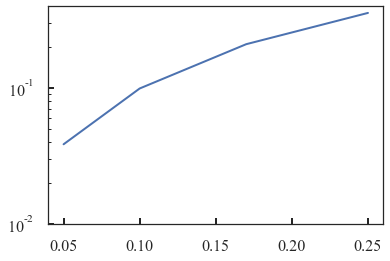

In [16]:
plt.plot(PMMAG,peri/apo)
plt.semilogy()
plt.ylim(1e-2,)

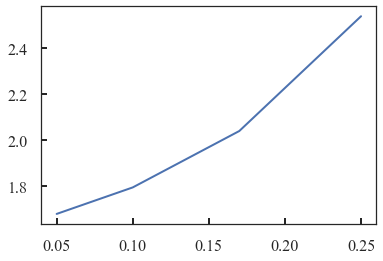

In [17]:
plt.plot(PMMAG,perd)

[]

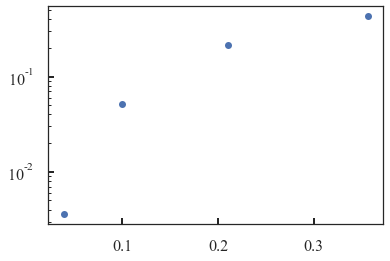

In [19]:
plt.plot(peri/apo,mass_l,'.')
plt.semilogy()

In [3]:
table_str = r'\begin{tabular}{ccccc}\hline$|\mu|/\,\mathrm{mas\,yr}^{-1}$'+\
            r'&$r_p/\,\mathrm{kpc}$&$r_a/\,\mathrm{kpc}$&$T_r/\,\mathrm{Gyr}$'+\
            r'&$r_t(r_p)/\,\mathrm{kpc}$\\\hline'
table_str+=r'\\'.join([r'&'.join([r'%0.3g'%p for p in P]) for P in zip(PMMAG,peri,apo,perd,tidalP)])
table_str+=r'\\\hline\end{tabular}'
print table_str

\begin{tabular}{ccccc}\hline$|\mu|/\,\mathrm{mas\,yr}^{-1}$&$r_p/\,\mathrm{kpc}$&$r_a/\,\mathrm{kpc}$&$T_r/\,\mathrm{Gyr}$&$r_t(r_p)/\,\mathrm{kpc}$\\\hline0.05&4.99&130&1.64&0.139\\0.1&13&131&1.75&0.636\\0.17&28.4&135&1.99&1.79\\0.25&52&146&2.48&3.53\\\hline\end{tabular}


In [4]:
NP[2]

6.0